# Import Library

In [78]:
!pip3 install plotly

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [80]:
df = pd.read_csv('Datasets/IT_customer_churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [81]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [82]:
# df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [83]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [84]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
pd.to_numeric(df['TotalCharges'], errors='coerce').isnull().sum()

11

** Remove rows with space in TotalCharges

In [86]:
df1 = df[df['TotalCharges']!=' ']
# df1.shape
# df.shape

In [87]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [88]:
type(df1)

pandas.core.frame.DataFrame

In [89]:
df1.shape

(7032, 20)

In [90]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Visualization

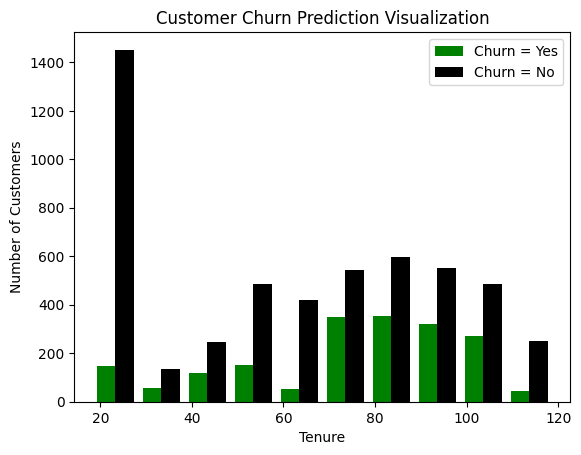

In [91]:
MonthlyCharges_churn_no = df1[df1.Churn=='No'].MonthlyCharges
MonthlyCharges_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=['green', 'black'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.show()

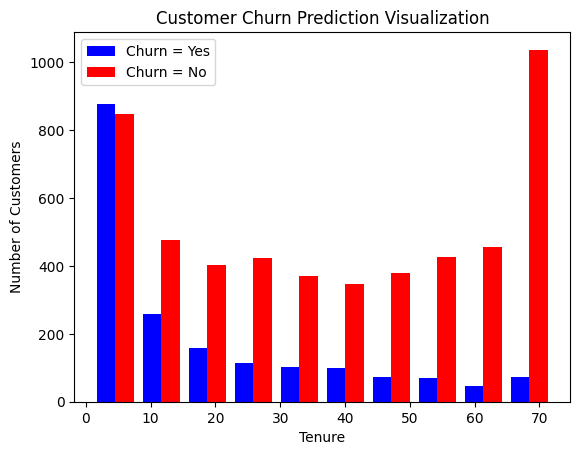

In [92]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes, tenure_churn_no], color=['blue', 'red'], label=['Churn = Yes', 'Churn = No'])
plt.legend()
plt.show()

# Data Preprocessing 

In [93]:
#  See unique values in object columns 

def show_unique_value_col(df):
    for column in df :
        if df[column].dtype=='object':
            print(f'{column}: {df[column].unique()}')
        

In [94]:
show_unique_value_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [95]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

In [96]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [97]:
show_unique_value_col(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [98]:
columns_yes_no = [
    'Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'
]

for col in columns_yes_no:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)

In [99]:
# show_unique_value_col(df1)
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [100]:
# OnHotEncoding categorical columns
df1['gender'].replace({'Male': 1, 'Female': 0}, inplace=True)

In [104]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
PaperlessBilling: [1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]
InternetService_DSL: [1. 0.]
InternetService_Fiber optic: [0. 1.]
InternetService_No: [0. 1.]
Contract_Month-to-month: [1. 0.]
Contract_One year: [0. 1.]
Contract_Two year: [0. 1.]
PaymentMethod_Bank transfer (automatic): [0. 1.]
PaymentMethod_Credit card (automatic): [0. 1.]
PaymentMethod_Electronic check: [1. 0.]
PaymentMethod_Mailed check: [0. 1.]


In [102]:
df1 = pd.get_dummies(df1, ['InternetService','Contract','PaymentMethod'], dtype=float)

In [103]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6899,1,0,0,0,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
327,0,1,0,0,2,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4452,0,0,1,0,70,1,0,1,1,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
717,1,0,0,0,32,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4426,0,0,0,1,16,1,1,0,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Scaling

In [105]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [107]:
cols_to_scal = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df1[cols_to_scal] = scaler.fit_transform(df1[cols_to_scal])

In [108]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

# Train Test Split

In [109]:
X = df1.drop('Churn', axis='columns')
y = df1.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [110]:
y_train.value_counts()

Churn
0.0    4130
1.0    1495
Name: count, dtype: int64

In [111]:
y.value_counts()

Churn
0.0    5163
1.0    1869
Name: count, dtype: int64

In [112]:
y_test.value_counts()

Churn
0.0    1033
1.0     374
Name: count, dtype: int64

In [114]:
X_train.shape

(5625, 26)

In [117]:
X_test.shape

(1407, 26)

In [118]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,0,0,0,0,0.000000,1,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2446,0,0,0,0,0.239437,1,1,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1680,1,0,1,1,0.774648,1,1,0,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2220,1,0,1,0,1.000000,1,0,1,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2842,0,0,0,0,0.042254,0,0,1,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5131,0,0,1,0,0.605634,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4372,1,0,1,1,0.000000,1,0,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4687,1,0,1,0,0.295775,1,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2385,0,0,0,1,0.028169,0,0,0,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6773,1,1,1,0,0.507042,1,1,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [119]:
len(X_train.columns)

26

# Train The Model

In [122]:
def log_reg(X_train, X_test, y_train,  y_test, weights):
    if weights==-1:
        model = LogisticRegression()
    else:
        model = LogisticRegression(class_weight={0:weights[0], 1:weights[1]})

    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print('Accuracy', acc, '\n')

    y_pred = model.predict(X_test)
    print('preds', y_pred[:5], '\n')

    cl_rep = classification_report(y_test, y_pred)
    print(cl_rep)


In [123]:
weights = -1
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.8031272210376688 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1033
         1.0       0.66      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [124]:
weights = [1, 1.5]
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.7931769722814499 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.86      1033
         1.0       0.60      0.68      0.64       374

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.80      0.79      0.80      1407



In [125]:
weights = [1, 2]
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.7739872068230277 

preds [0. 0. 0. 0. 1.] 

              precision    recall  f1-score   support

         0.0       0.89      0.79      0.84      1033
         1.0       0.56      0.74      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.74      1407
weighted avg       0.80      0.77      0.78      1407



# Imbalanced Dataset

*** Method1 : Undersampling***

In [130]:
# Class Count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df1[df1['Churn'] == 0]
df_class_1 = df1[df1['Churn'] == 1]

In [131]:
count_class_0

5163

In [132]:
count_class_1

1869

In [133]:
#  Undersampling 0-class and concat DataFrames of voth class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random Under-Sampling')
print(df_test_under.Churn.value_counts())

Random Under-Sampling
Churn
0    1869
1    1869
Name: count, dtype: int64


In [134]:
X = df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=15, stratify=y)


In [135]:
# Number of classes in training data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

# Trainig Model

In [136]:
weights = -1
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.7419786096256684 

preds [0 1 1 1 0] 

              precision    recall  f1-score   support

           0       0.76      0.71      0.73       374
           1       0.73      0.78      0.75       374

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748



*** Method 2 : Oversampling

In [137]:
# oversampling 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over- sampling:')
print(df_test_over.Churn.value_counts())

Random over- sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [138]:
X = df_test_over.drop('Churn', axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15, stratify=y)

In [139]:
#  Number of classes in training data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

# Train Model

In [140]:
weights = -1
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.7637947725072604 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1033
           1       0.75      0.80      0.77      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



***Method 3 : SMOTE***

In [141]:
# To install imbalanced-learn library use 'pip install imbalanced-learn' command
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,  y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [144]:
#  Number of classes in training data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

# Final Result : Logistic Regression

In [145]:
weights = -1
log_reg(X_train, X_test, y_train,  y_test, weights)

Accuracy 0.7904162633107454 

preds [1 0 1 1 0] 

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1033
           1       0.77      0.82      0.80      1033

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

